# Data Cleaning And Company's Budget/Gross Earning Correlation

The dataset can be downloaded from the kaggle website via this link [https://www.kaggle.com/datasets/danielgrijalvas/movies](https://)

In [1]:
#importing libaries

import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('/content/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.shape

(7668, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
#Check for missing values in the columns

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
#df['budget'] = df['budget'].astype('int64')
#df['gross'] = df['gross'].astype('int64')

In [7]:
A = df['released'].str.split(pat = '(', n= 1, expand= True)


In [8]:
A

,0,1
0,"June 13, 1980",United States)
1,"July 2, 1980",United States)
2,"June 20, 1980",United States)
3,"July 2, 1980",United States)
4,"July 25, 1980",United States)
...,...,...
7663,"October 23, 2020",United States)
7664,"February 7, 2020",United States)
7665,"April 27, 2020",Cameroon)
7666,"October 1, 2020",United States)


In [9]:
df['released_country'] = A[1].str.replace(')', '')
#df['released'] = datetime.strptime(df['released'].astype('str'), '%d-%m-%Y')

<ipython-input-9-80e94bdbdef4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['released_country'] = A[1].str.replace(')', '')


In [10]:
df['released_date'] = A[0].str.replace(',', '').str.rstrip()

In [11]:
df['released_date'] = df['released_date'].astype('str')

In [12]:
df['correct_year'] = df['released_date'].str[-4:]

In [13]:
df['correct_year']

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7663    2020
7664    2020
7665    2020
7666    2020
7667    2020
Name: correct_year, Length: 7668, dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              7668 non-null   object 
 1   rating            7591 non-null   object 
 2   genre             7668 non-null   object 
 3   year              7668 non-null   int64  
 4   released          7666 non-null   object 
 5   score             7665 non-null   float64
 6   votes             7665 non-null   float64
 7   director          7668 non-null   object 
 8   writer            7665 non-null   object 
 9   star              7667 non-null   object 
 10  country           7665 non-null   object 
 11  budget            5497 non-null   float64
 12  gross             7479 non-null   float64
 13  company           7651 non-null   object 
 14  runtime           7664 non-null   float64
 15  released_country  7666 non-null   object 
 16  released_date     7668 non-null   object 


In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_country,released_date,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,United States,June 13 1980,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,United States,July 2 1980,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,United States,June 20 1980,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,United States,July 2 1980,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,United States,July 25 1980,1980


In [27]:
pd.set_option('display.max_rows', None)

In [28]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

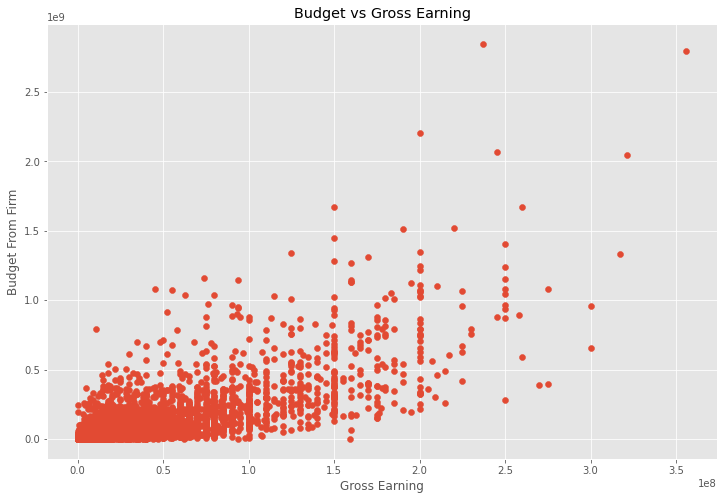

In [29]:
plt.scatter(x= df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earning')
plt.ylabel('Budget From Firm')
plt.show()

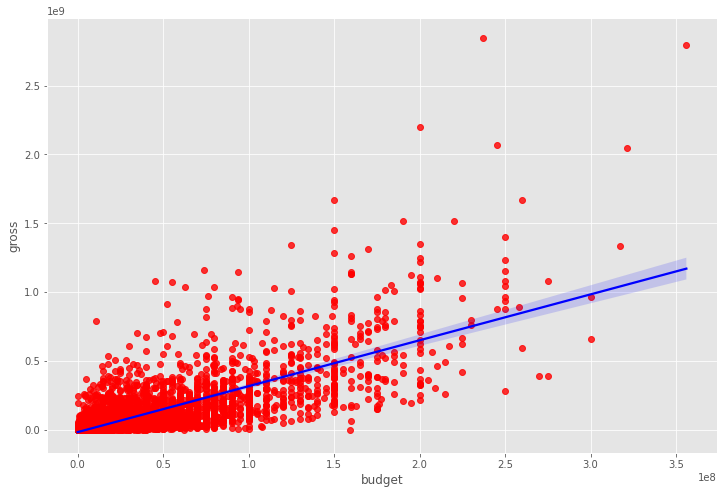

In [30]:
# Plotting budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

In [31]:
df.corr(method='pearson') #pearson, Kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


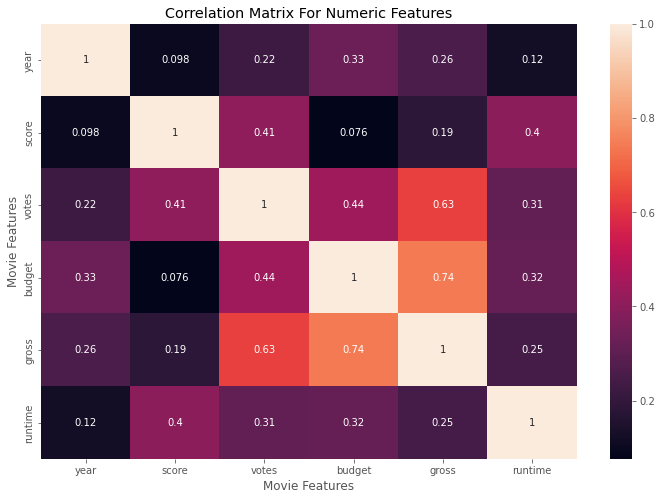

In [32]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [33]:
df_numerize = df.copy()

In [42]:
for col in df_numerize.columns:
  if df_numerize[col].dtype == 'object' :
    df_numerize[col] =df_numerize[col].astype('category')
    df_numerize[col] = df_numerize[col].cat.codes

df_numerize.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_country,released_date,correct_year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,56,610,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,56,153,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,56,616,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,56,612,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,56,161,38


In [41]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_country,released_date,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,United States,December 18 2009,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,United States,April 26 2019,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,United States,December 19 1997,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,United States,December 18 2015,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,United States,April 27 2018,2018


In [26]:
df_numerize.corr(method='pearson') #pearson, Kendall, spearman

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_country,released_date,correct_year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,-0.001968,-0.010398,0.011134
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.023977,0.016326,0.007054
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,-0.091572,0.029641,-0.077550
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,-0.089289,-0.000066,0.997295
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,-0.044096,0.998400,-0.005455
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,-0.092763,0.042284,0.105601
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.092014,0.017168,0.218364
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,0.013331,-0.001323,-0.020439
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.001201,-0.002798,-0.008807
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,-0.023540,0.015626,-0.027576


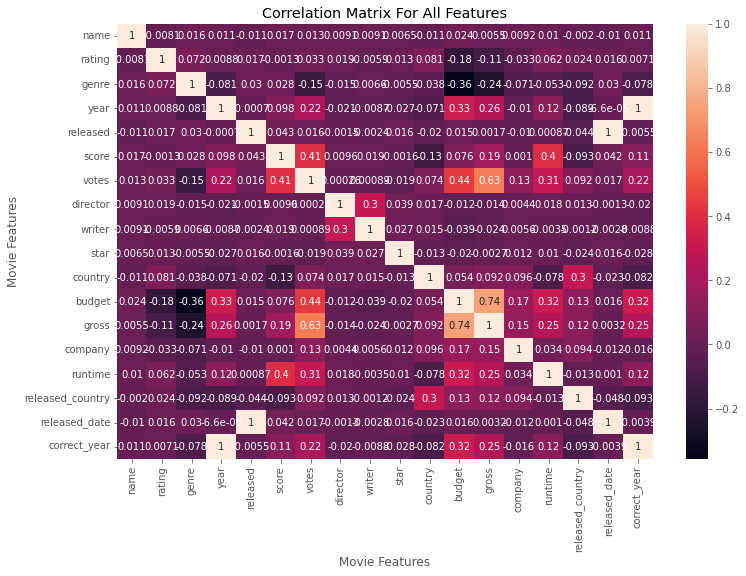

In [37]:
correlation_matrix = df_numerize.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix For All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [38]:
correlation_pair = correlation_matrix.unstack()

correlation_pair

name              name                1.000000
                  rating             -0.008069
                  genre               0.016355
                  year                0.011453
                  released           -0.011311
                  score               0.017097
                  votes               0.013088
                  director            0.009079
                  writer              0.009081
                  star                0.006472
                  country            -0.010737
                  budget              0.023970
                  gross               0.005533
                  company             0.009211
                  runtime             0.010392
                  released_country   -0.001968
                  released_date      -0.010398
                  correct_year        0.011134
rating            name               -0.008069
                  rating              1.000000
                  genre               0.072423
             

In [39]:
sorted_pair = correlation_pair.sort_values()

sorted_pair

budget            genre              -0.356564
genre             budget             -0.356564
gross             genre              -0.235650
genre             gross              -0.235650
rating            budget             -0.176002
budget            rating             -0.176002
votes             genre              -0.145307
genre             votes              -0.145307
score             country            -0.133348
country           score              -0.133348
rating            gross              -0.107339
gross             rating             -0.107339
released_country  correct_year       -0.093351
correct_year      released_country   -0.093351
score             released_country   -0.092763
released_country  score              -0.092763
                  genre              -0.091572
genre             released_country   -0.091572
released_country  year               -0.089289
year              released_country   -0.089289
country           correct_year       -0.082274
correct_year 

In [40]:
high_correlation = sorted_pair[sorted_pair > 0.5]

high_correlation

gross             votes               0.630757
votes             gross               0.630757
gross             budget              0.740395
budget            gross               0.740395
year              correct_year        0.997295
correct_year      year                0.997295
released_date     released            0.998400
released          released_date       0.998400
name              name                1.000000
released_country  released_country    1.000000
rating            rating              1.000000
genre             genre               1.000000
year              year                1.000000
released          released            1.000000
score             score               1.000000
votes             votes               1.000000
released_date     released_date       1.000000
director          director            1.000000
star              star                1.000000
country           country             1.000000
budget            budget              1.000000
gross        